In [2]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [3]:
import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from glob import glob
from hydra import initialize, compose

from mejiro.helpers import test_physical_lens
from mejiro.pandeia import pandeia_input
from mejiro.pandeia.pandeia_output import PandeiaOutput
from mejiro.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/mejiro/mplstyle/science.mplstyle')

In [4]:
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir, pickle_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir, config.machine.pickle_dir
array_dir = os.path.join(array_dir, 'multiprocessing')
figure_dir = os.path.join(repo_dir, 'figures')

In [5]:
image_filepaths = glob(array_dir + '/skypy_output_*_*.npy')
image_list = []
for filepath in image_filepaths:
    image_list.append(np.load(filepath))

# execution_times = np.load(os.path.join(array_dir, 'skypy_output_execution_times.npy'))

In [6]:
first_half = image_list[:100]
second_half = image_list[100:]

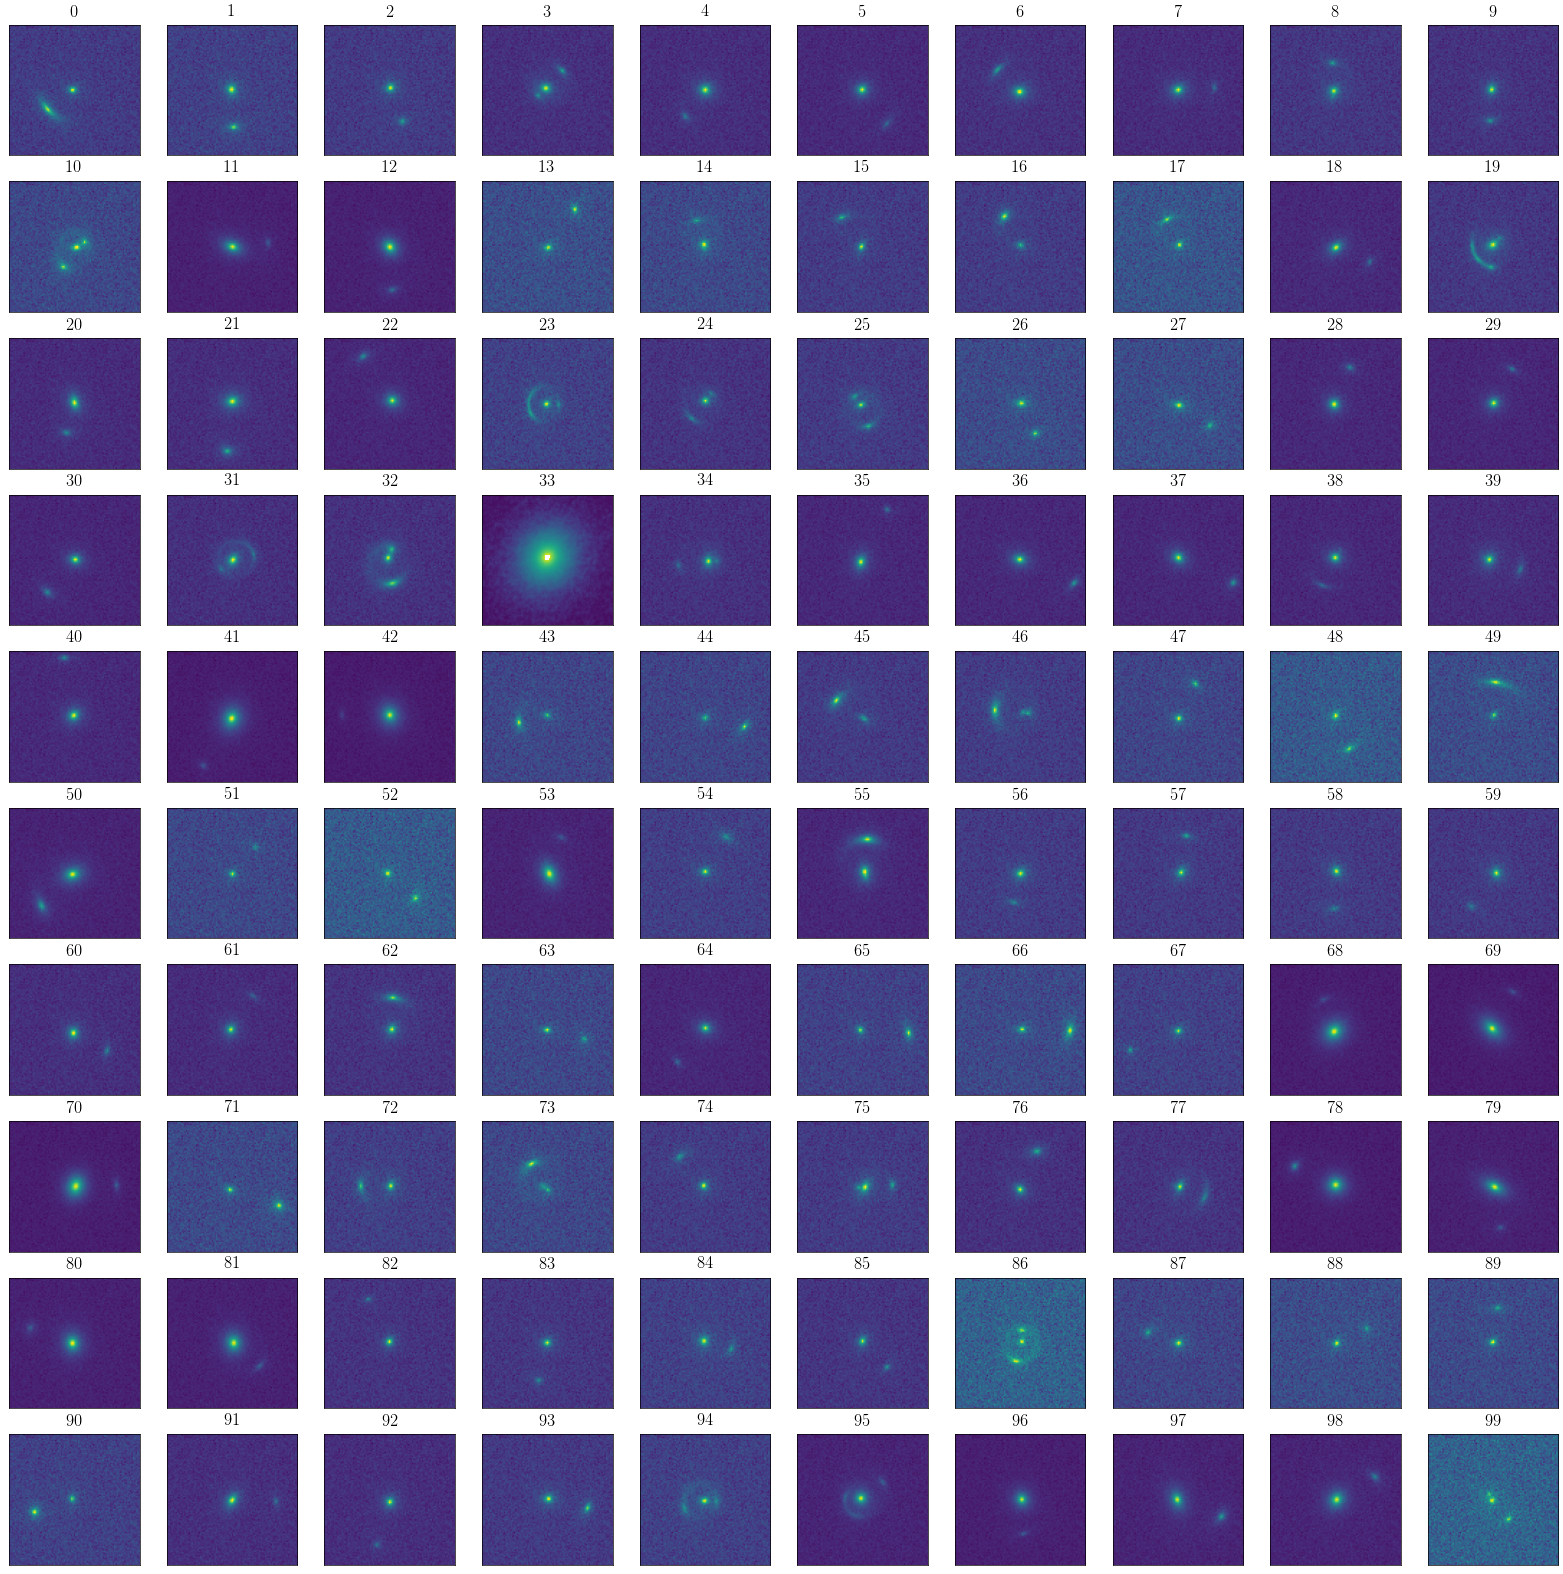

In [7]:
side = 10
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20))  # gridspec_kw={'hspace': 0.02,'wspace':0.02}

for i, image in enumerate(first_half):
    ax[i // side, i % side].imshow(np.log10(image), cmap='viridis')
    ax[i // side, i % side].get_xaxis().set_visible(False)
    ax[i // side, i % side].get_yaxis().set_visible(False)
    ax[i // side, i % side].set_title(f'{i}')

plt.savefig(os.path.join(figure_dir, 'skypy_output_pandeia_test.png'))
plt.show()

TypeError: ufunc 'log10' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

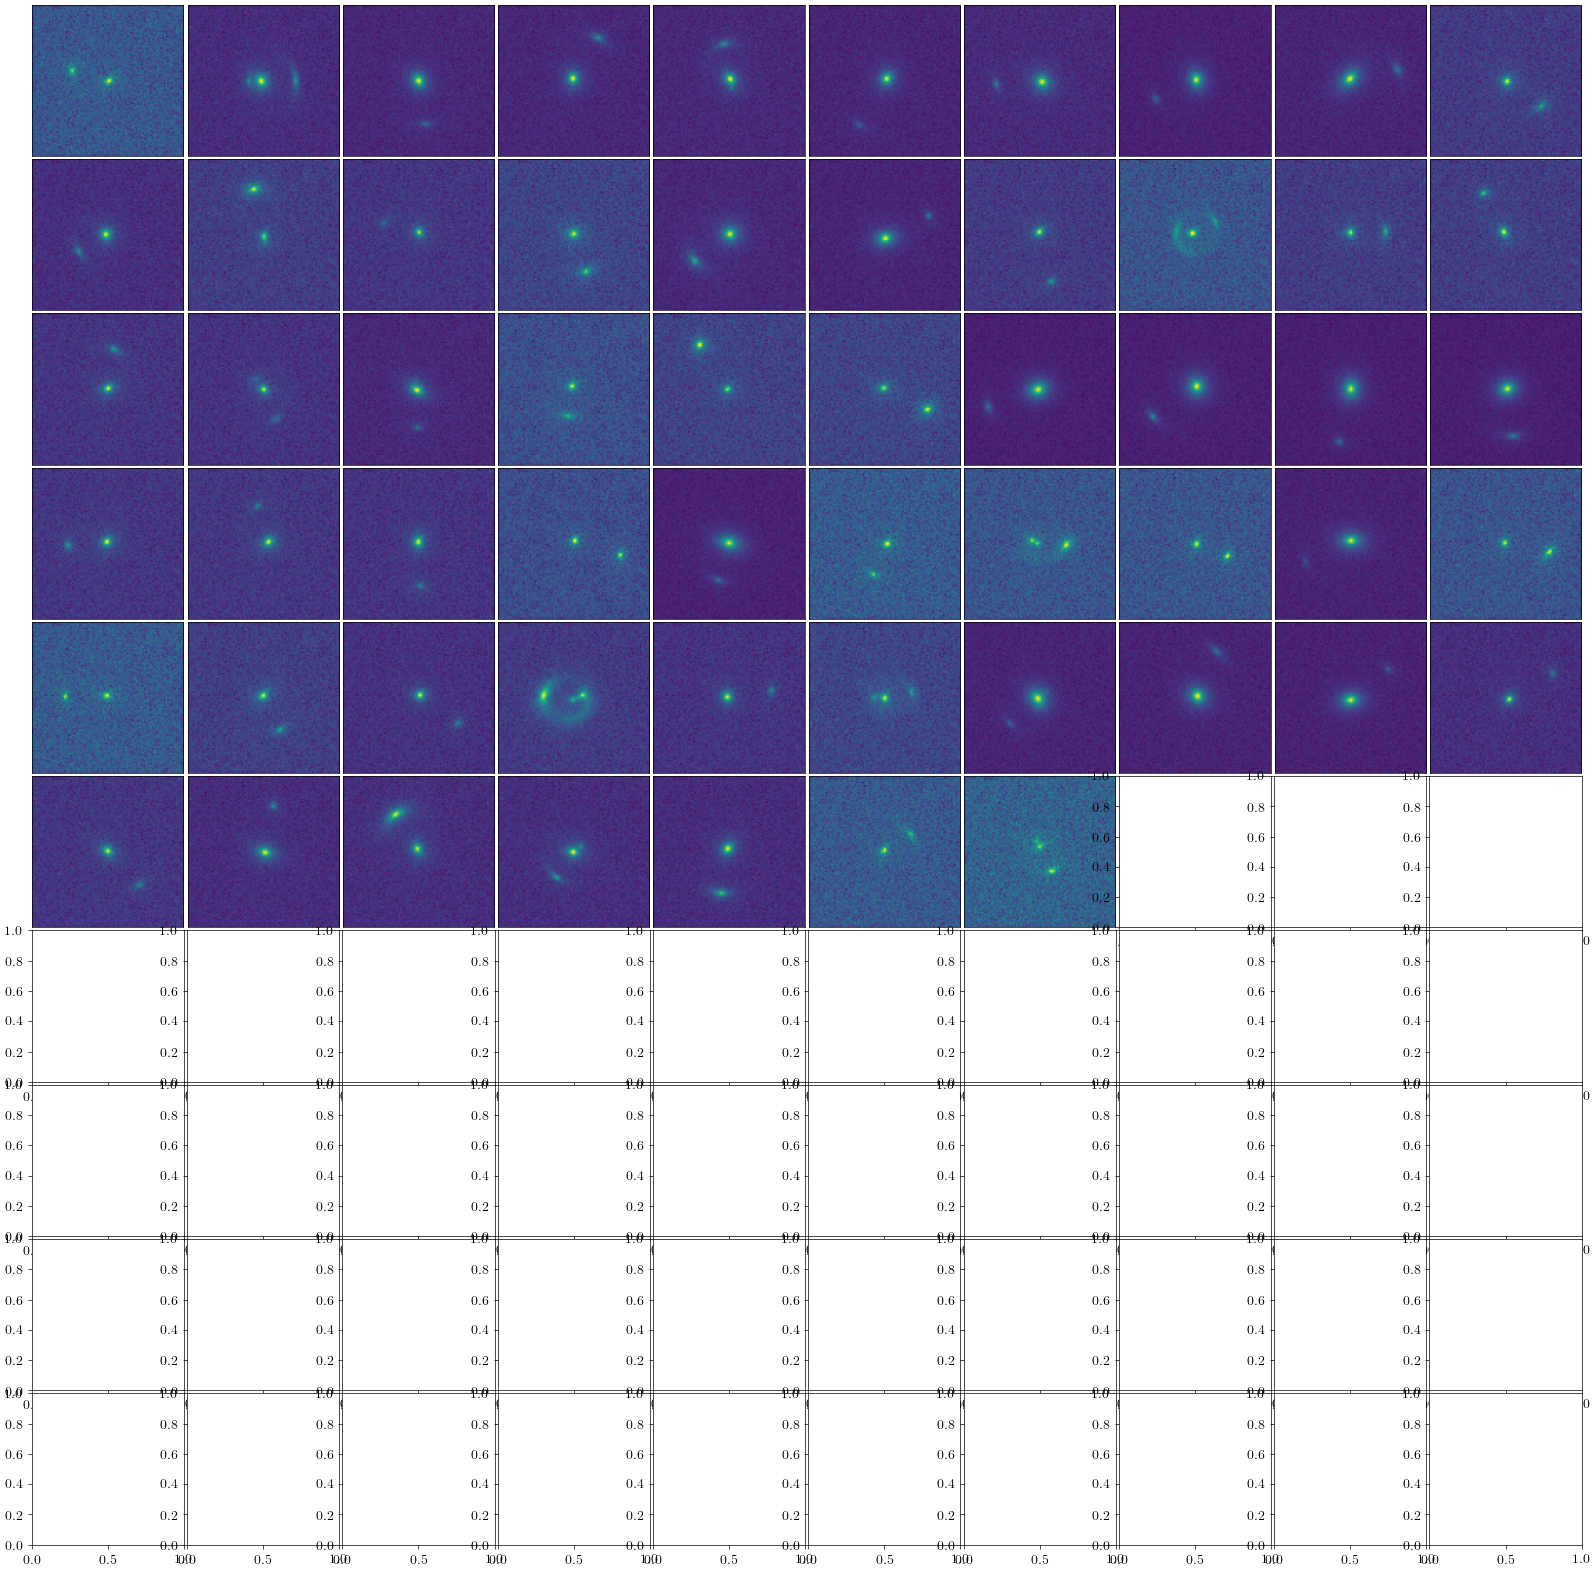

In [8]:
side = 10
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02, 'wspace': 0.02})

for i, image in enumerate(second_half):
    ax[i // side, i % side].imshow(np.log10(image), cmap='viridis')
    ax[i // side, i % side].get_xaxis().set_visible(False)
    ax[i // side, i % side].get_yaxis().set_visible(False)

plt.savefig(os.path.join(figure_dir, 'skypy_output_pandeia_test.png'))
plt.show()